## _Building Graphs: Input Edges_

In [1]:
import glob, os, sys, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
# append parent dir
sys.path.append('..')

# local imports
from src import Compose_Event, Draw_Compose_Event

### _(+) - Input Data_

In [6]:
# input data
input_dir = '../train_all'

In [7]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

In [8]:
# file_prefixes[:10]

In [9]:
event_id = 1
event_prefix = file_prefixes[event_id]

In [10]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))

event0000000001 memory usage 0.03 MB


In [11]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-7.87217,14.645000,35.0,9,0,7
1,2,-8.74686,15.150000,35.0,9,1,112
2,3,-8.74686,16.160000,35.0,9,2,222
3,4,-9.62154,16.665001,35.0,9,3,339
4,5,-9.62154,17.674999,35.0,9,4,461


In [12]:
hits.layer_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int32)

In [13]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.312154,8106480.0,8.10648,9,0,7,0,0
1,2,0.243986,4438520.0,4.43852,9,1,112,0,0
2,3,0.227273,12218100.0,12.21810,9,2,222,0,0
3,4,0.326345,4719830.0,4.71983,9,3,339,0,0
4,5,0.112023,12483800.0,12.48380,9,4,461,0,0


In [14]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.467824,0.843642,-0.308224,1,26,13,0
1,2,0.0,0.0,0.0,-0.295066,0.393566,-0.364931,1,25,13,0
2,3,0.0,0.0,0.0,-0.266403,0.004486,0.150829,1,27,13,0
3,4,0.0,0.0,0.0,0.004641,0.066527,0.119620,1,40,13,0
4,5,0.0,0.0,0.0,0.193790,0.088343,0.188068,1,23,13,0


In [15]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-8.14818,14.503100,-12.1190,-0.304760,0.592697,-0.481614,1.0,10
1,2,-8.53445,15.258200,-12.7318,-0.302497,0.593937,-0.481471,1.0,10
2,3,-8.94150,16.061899,-13.3825,-0.299945,0.595248,-0.481365,1.0,10
3,4,-9.31965,16.815701,-13.9915,-0.297617,0.596324,-0.481449,1.0,10
4,5,-9.72147,17.625601,-14.6446,-0.295214,0.597517,-0.481419,1.0,10


### _(+) - Build Event_

- functions from _event_utils.py_

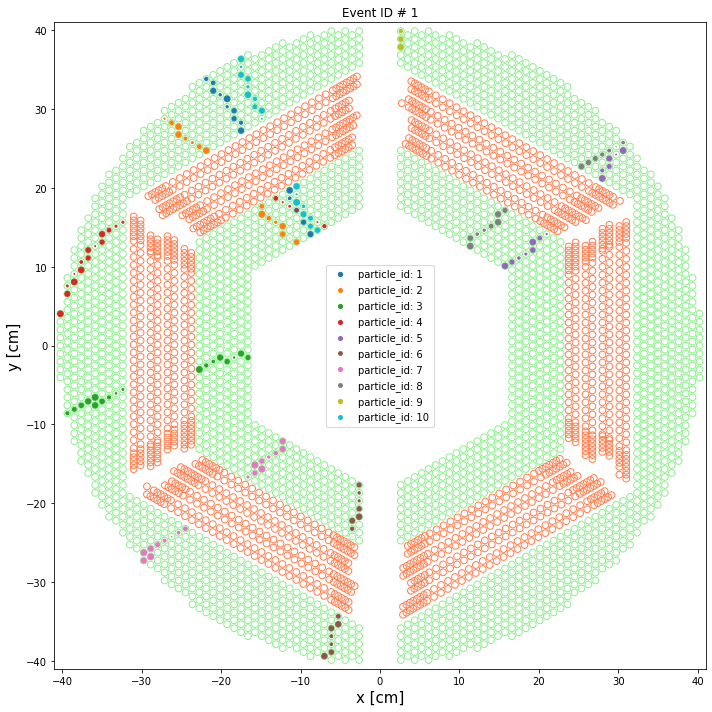

In [16]:
event = Compose_Event(event_prefix,skewed=False)
Draw_Compose_Event(event,figsize=(10,10));

In [17]:
event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,sector_id,...,tpx,tpy,tpz,weight,particle_id,vx,vy,vz,pt,event_id
0,1,-7.87217,14.645000,35.0,9,0,7,0.312154,0,0,...,-0.304760,0.592697,-0.481614,1.0,10,0.0,0.0,0.0,0.666460,1
1,30,11.37090,12.625000,35.0,9,0,94,0.445773,0,5,...,0.165284,0.150299,0.128031,1.0,8,0.0,0.0,0.0,0.223402,1
2,53,-12.24560,-12.120000,35.0,9,0,41,0.361464,0,2,...,-0.382568,-0.354540,1.158790,1.0,7,0.0,0.0,0.0,0.521591,1
3,79,-2.62406,-17.674999,35.0,9,0,52,0.260180,0,2,...,-0.172680,-1.077650,-0.715263,1.0,6,0.0,0.0,0.0,1.091397,1
4,102,15.74430,10.100000,35.0,9,0,89,0.423630,0,5,...,0.165130,0.132830,0.181957,1.0,5,0.0,0.0,0.0,0.211924,1


In [18]:
event.layer.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

## _Build Graphs_

### _(A) - True Edges (Layerwise)_

**True Graph** is the ground truth for GNN. It is built from creating edges from _`hits`_ from the same particle but in adjacent layers. 

For this purpose one has _`true_edges, hits = get_layerwise_edges(event)`_ function in the _`event_util.py`_.

In [19]:
from LightningModules.Processing.utils.event_utils import get_layerwise_edges

In [20]:
true_edges, hits = get_layerwise_edges(event)

In [21]:
hits.head()

,index,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,...,tpy,tpz,weight,particle_id,vx,vy,vz,pt,event_id,R
0,0,1,-7.872170,14.645,35.0,9,0,7,0.312154,0,...,0.592697,-0.481614,1.0,10.0,0.0,0.0,0.0,0.666460,1,38.748512
1,1,217,-8.746860,14.140,35.0,9,0,8,0.373074,0,...,0.815812,-0.305383,1.0,1.0,0.0,0.0,0.0,0.961986,1,38.748512
2,2,165,-16.618999,-1.515,35.0,9,0,28,0.269647,0,...,-0.044300,0.153567,1.0,3.0,0.0,0.0,0.0,0.257607,1,38.774815
3,3,125,-6.997490,15.150,35.0,9,0,6,0.158220,0,...,0.039713,0.107854,1.0,4.0,0.0,0.0,0.0,0.063603,1,38.774830
4,4,192,-10.496200,13.130,35.0,9,0,10,0.305783,0,...,0.359121,-0.362821,1.0,2.0,0.0,0.0,0.0,0.485328,1,38.827400


In [22]:
# lets get unique pids with freq (~ hits).
sel_pids, sel_pids_fr = np.unique(hits.particle_id, return_counts=True)
print(sel_pids)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


### _(B) - Input Edges (Layerwise)_

**Input Graph** is the training input to GNN. It is build from edges from hits from all particles but in adjacent layers.

- use same `hits` from `get_layerwise_edges()`
- make `get_input_graph()` function similar to `get_layerwise_edges()`
- add to Data variable.

In [23]:
# layer_groups.size()
# layer_groups.groups
# layer_groups.first()
# layer_groups.last()
# layer_groups.ngroups
# layer_groups.groups.keys()

In [24]:
def select_segments(hits1, hits2, filtering=True):
    
    # TODO: Impelement filtering flag
    # Start with all possible pairs of hits
    keys = ['event_id', 'r', 'phi', 'isochrone', 'sector_id']
    hit_pairs = hits1[keys].reset_index().merge(hits2[keys].reset_index(), on='event_id', suffixes=('_1', '_2'))
    
    if filtering:
        dSector = (hit_pairs['sector_id_1'] - hit_pairs['sector_id_2'])
        sector_mask = ((dSector.abs() < 2) | (dSector.abs() == 5))
        segments = hit_pairs[['index_1', 'index_2']][sector_mask]
    else:
        segments = hit_pairs[['index_1', 'index_2']]
        
    return segments

def construct_graph(hits, layer_pairs, filtering=True):
    """Construct one graph (e.g. from one event)"""

    # Loop over layer pairs and construct segments
    layer_groups = hits.groupby('layer')
    segments = []
    for (layer1, layer2) in layer_pairs:
        
        # Find and join all hit pairs
        try:
            hits1 = layer_groups.get_group(layer1)
            hits2 = layer_groups.get_group(layer2)
        # If an event has no hits on a layer, we get a KeyError.
        # In that case we just skip to the next layer pair
        except KeyError as e:
            logging.info('skipping empty layer: %s' % e)
            continue
        
        # Construct the segments
        segments.append(select_segments(hits1, hits2, filtering))
    
    # Combine segments from all layer pairs
    # segments = pd.concat(segments)
    return segments

In [25]:
# get number of layers, without skewed layers its just 18
n_layers = hits.layer.unique().shape[0]
print("total number of layers (w/o skewed): {}".format(n_layers))

total number of layers (w/o skewed): 18


In [26]:
# lets get pairs to adjacent layers
layers = np.arange(n_layers)
layer_pairs = np.stack([layers[:-1], layers[1:]], axis=1)
layer_pairs

array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16],
       [16, 17]])

In [27]:
# returns a list of indices from layer pairs.
segments = construct_graph(hits, layer_pairs, filtering=True)

In [28]:
# Combine segments from all layer pairs
# segments = pd.concat(segments)
# segments.describe()

In [29]:
# let's see the first layer pair (0th element)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(segments[0][["index_1", "index_2"]])

In [30]:
# get the layer pari [0,1] from segments
edge_index = segments[0].to_numpy().T

In [31]:
edge_index.shape

(2, 53)

In [32]:
edge_index[0]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  6,  6,  6, 13, 13, 13, 19, 19, 19, 19,
       19, 19])

In [33]:
edge_index[1]

array([ 7,  8,  9, 10, 11, 12, 30,  7,  8,  9, 10, 11, 12, 30,  7,  8,  9,
       10, 12, 14, 22,  7,  8,  9, 10, 11, 12, 30,  7,  8,  9, 10, 11, 12,
       30,  7,  8, 10, 11, 12, 30,  9, 14, 22,  9, 14, 22,  7,  8, 10, 11,
       12, 30])

In [34]:
# hits.query("layer==0")

In [35]:
# hits.query("layer==1")

In [36]:
edge_index.shape[1] == len(segments[0])

True

### _(+) - Plotting Input Edges_

In [37]:
from src.drawing import detector_layout
from src.utils_math import polar_to_cartesian

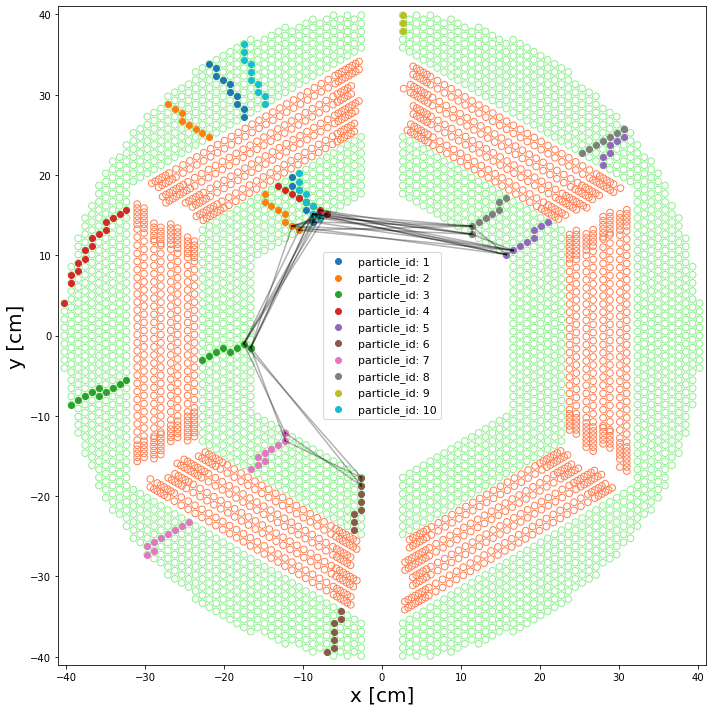

In [38]:
# plotting input_edges
plt.close('all')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

p_ids = np.unique(event.particle_id.values)
det = pd.read_csv("../src/stt.csv")
skw = det.query('skewed==0')
nkw = det.query('skewed==1') # one may look for +ve/-ve polarity
    
# detector layout
plt.scatter(skw.x.values, skw.y.values, s=44, facecolors='none', edgecolors='lightgreen')
plt.scatter(nkw.x.values, nkw.y.values, s=44, facecolors='none', edgecolors='coral')

# particle tracks
for pid in sel_pids:
    idx = hits.particle_id == pid
    ax.scatter(hits[idx].x.values, hits[idx].y.values, label='particle_id: %d' %pid)
    
# input edges
for iedge in range(edge_index.shape[1]):
    pt1 = hits.iloc[edge_index[0][iedge]]
    pt2 = hits.iloc[edge_index[1][iedge]]
    ax.plot([pt1.x, pt2.x], [pt1.y, pt2.y], color='k', alpha=0.3, lw=1.5)

# plotting params
ax.set_xlabel('x [cm]', fontsize=20)
ax.set_ylabel('y [cm]', fontsize=20)
# ax.set_title('Event ID # %d' % event_id)
ax.set_xlim(-41, 41)
ax.set_ylim(-41, 41)
ax.grid(False)
ax.legend(fontsize=11, loc='best')
fig.tight_layout()
fig.savefig("input_edges.pdf")

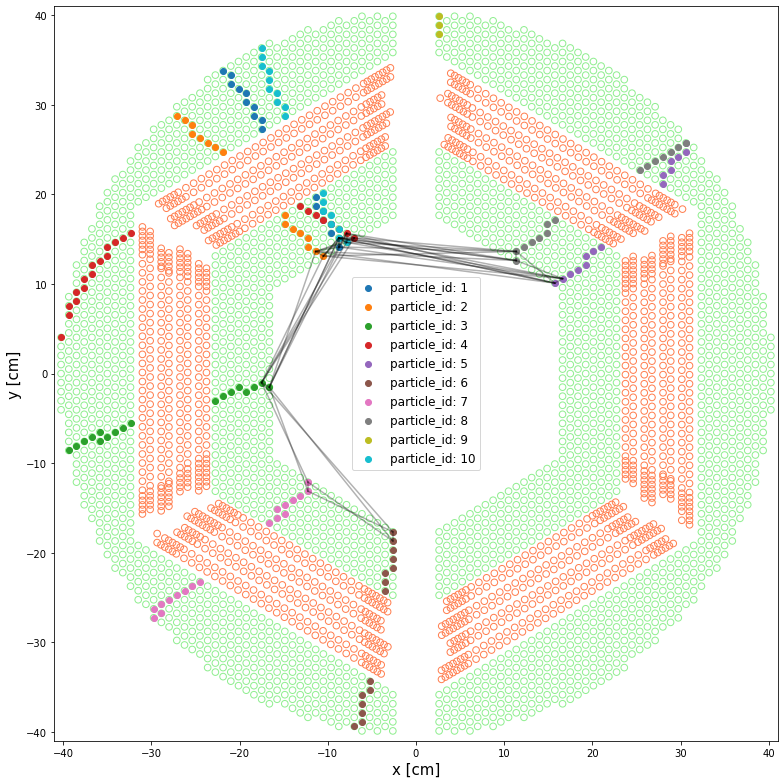

In [39]:
# New Plotting Scheme
fig, ax = detector_layout(figsize=(11,11))

# particle tracks
for pid in sel_pids:
    idx = hits.particle_id == pid
    ax.scatter(hits[idx].x.values, hits[idx].y.values, label='particle_id: %d' %pid)
    
# input edges
for iedge in range(edge_index.shape[1]):
    pt1 = hits.iloc[edge_index[0][iedge]]
    pt2 = hits.iloc[edge_index[1][iedge]]
    ax.plot([pt1.x, pt2.x], [pt1.y, pt2.y], color='k', alpha=0.3, lw=1.5)

# axis params
ax.legend(fontsize=12, loc='best')
fig.tight_layout()
# fig.savefig("input_edges.pdf")

### _(+) Sector-wise Filtering_

* build edges only in neighouring sectors _i.e._ `|sector_id_i - sector_id_j| < 2`

In [40]:
# lets take first layer_pair and corresponding hits
layer_pairs[0]

array([0, 1])

In [41]:
layer_groups = hits.groupby('layer')

In [42]:
hits1 = layer_groups.get_group(0)
hits2 = layer_groups.get_group(1)

In [43]:
keys = ['event_id', 'r', 'phi', 'isochrone', 'sector_id']
hit_pairs = hits1[keys].reset_index().merge(hits2[keys].reset_index(), on='event_id', suffixes=('_1', '_2'))
hit_pairs

,index_1,event_id,r_1,phi_1,isochrone_1,sector_id_1,index_2,r_2,phi_2,isochrone_2,sector_id_2
0,0,1,16.626699,2.064018,0.312154,0,7,17.493713,2.094395,0.243986,0
1,0,1,16.626699,2.064018,0.312154,0,8,17.493713,2.094395,0.159956,0
2,0,1,16.626699,2.064018,0.312154,0,9,17.522833,-3.083922,0.378710,1
3,0,1,16.626699,2.064018,0.312154,0,10,17.522844,2.036724,0.012490,0
4,0,1,16.626699,2.064018,0.312154,0,11,17.754171,0.875695,0.312303,5
...,...,...,...,...,...,...,...,...,...,...,...
76,19,1,18.705427,0.570378,0.423630,5,11,17.754171,0.875695,0.312303,5
77,19,1,18.705427,0.570378,0.423630,5,12,17.754171,2.265898,0.001418,0
78,19,1,18.705427,0.570378,0.423630,5,14,17.954153,-2.321356,0.361928,2
79,19,1,18.705427,0.570378,0.423630,5,22,18.868357,-1.710320,0.089760,2


In [44]:
sector_mask = ((hit_pairs['sector_id_1'] - hit_pairs['sector_id_2']).abs() < 2)

In [45]:
sector_mask

0      True
1      True
2      True
3      True
4     False
      ...  
76     True
77    False
78    False
79    False
80     True
Length: 81, dtype: bool

In [46]:
hit_pairs[['index_1', 'index_2']].head()

,index_1,index_2
0,0,7
1,0,8
2,0,9
3,0,10
4,0,11


In [47]:
hit_pairs[['index_1', 'index_2']][sector_mask].head()

,index_1,index_2
0,0,7
1,0,8
2,0,9
3,0,10
5,0,12
